## Data Cleaning (keeping only images with faces and more than 1 eyes)

In [1]:
import numpy as np
import cv2
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

### Importing Image

In [2]:
img = cv2.imread(r"D:\VS Code\marvel_celebrity_image_classification\model\test_images\18.jpg")
img.shape

(1677, 1677, 3)

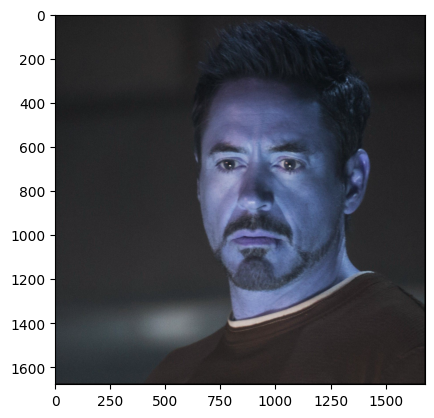

In [3]:
plt.imshow(img)

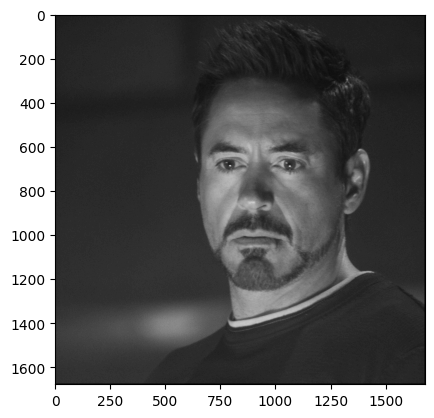

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

### Detecting Position of Face in Images

In [5]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade= cv2.CascadeClassifier('D:\\VS Code\\marvel_celebrity_image_classification\\model\\opencv\\haarcascades\\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

#Returned Values of faces (x,y,width & height) from where face starts forming a rectangle

array([[498, 317, 852, 852]], dtype=int32)

In [6]:
(x,y,w,h) = faces[0]
print(x,y,w,h)

498 317 852 852


### Plotting Red Rectangle around face in Image

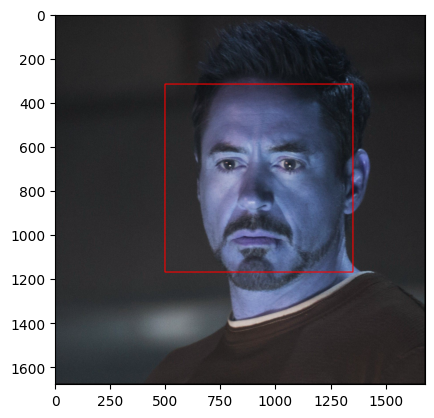

In [7]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)
plt.imshow(face_img)

cropped_img = img[y:y+h, x:x+w]
#plt.imshow(cropped_img)

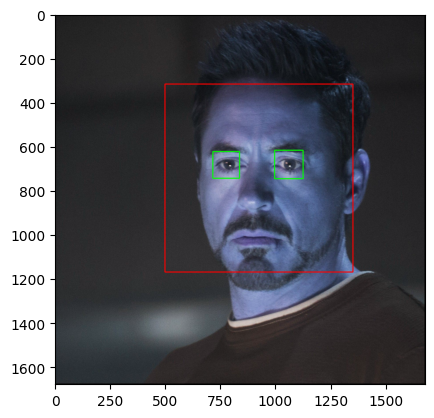

In [8]:
eyes = eye_cascade.detectMultiScale(gray,1.3,5)
for (ex,ey,ew,eh) in eyes:
    eye_img = cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)
    
plt.imshow(eye_img, cmap='gray')
#plt.imshow(cropped_img, cmap='gray')

### Funtion to return cropped Image

In [9]:
def crop_img(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    # Check if only one face is detected
    if len(faces) >= 1:
        x, y, w, h = faces[0]
        cropped_face = gray[y:y+h, x:x+w]
        # Detect eyes within the cropped face
        eyes = eye_cascade.detectMultiScale(cropped_face)
        # Check if exactly two eyes are detected
        if len(eyes) >= 2:
            return cropped_face      
       
#for (ex,ey,ew,eh) in eyes:
    #    eye_img = cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)

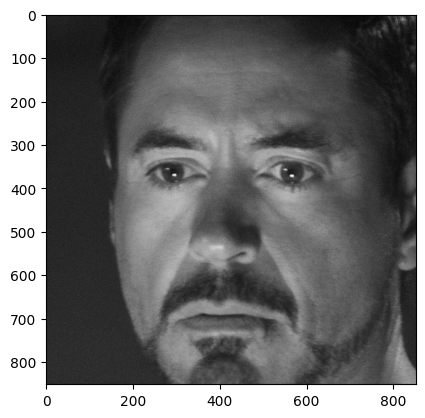

In [10]:
cropped_img = crop_img(r"D:\VS Code\marvel_celebrity_image_classification\model\test_images\18.jpg")    
plt.imshow(cropped_img, cmap='gray')
#print(cropped_img)

### Creating directories and storing path of all datasets

In [14]:
# Storing paths in variables
path_to_data = "./Dataset/"
path_to_cr_data = "./Dataset/cropped"

In [15]:
#Storing path of individual persons images
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

img_dirs

['./Dataset/Captain America',
 './Dataset/Spider Man - Toby Maguire',
 './Dataset/Thor',
 './Dataset/Tony Stark',
 './Dataset/Wolverine']

In [18]:
# If cropped folder exists remove it and create new folder, else create new folder

import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [19]:
#Celebrity name using directories
cropped_img_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)


Captain America
Spider Man - Toby Maguire
Thor
Tony Stark
Wolverine
